<a href="https://colab.research.google.com/github/AinsleyJacquemain/ASTRON-1221/blob/main/Gravitational_Wave_Project_Ainsley_Jacquemain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASTRO 1221-- Gravitational Waves Project

This code belongs to Ainsley Jacquemain and entails the import, analysis, and comparision of gravitational wave data from LIGO centers in Hanford, Washington and Livingston, Louisiana along with a sound byte of (and calculations for) nthe merger responsible for the signal.

My partners are Maggie Ramsey and Lisa Chiang. ☺

We begin by importing a package made specifically for the analysis of gravitational wave events.

In [1]:
! pip install gwpy #this is a package specifically created to read gravitational wave data in the format presented by LIGO.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 896.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.8 MB/s eta 0:00:00
  Created wheel for ligo-segments: filename=ligo_segments-1.4.0-cp310-cp310-linux_x86_64.whl size=99223 sha256=034caedfac8c65f47ea5db35225f1c0a11f43e9133f2618d803d6613379ee56e
  Stored in directory: /root/.cache/pip/wheels/6d/48/d1/3466977be4e41ba57f92ad0d5619f083df43cf319a151c4e06
Successfully built ligo-segments


The following example is from: https://gwpy.github.io/docs/stable/examples/signal/gw150914/

Next, we will import the data as obtained by the LIGO centers, cut it as is necessary, remove the noise, and transcribe it into reasonable parameters.

In [2]:
# # -- Set a GPS time:
t0 = 1264316116.4    # -- GW200129_065458
# Here we are using the event from 01-29-2020. 1264316116.4 is the GPS value given from the GWOSC website.

from gwpy.timeseries import TimeSeries #TimeSeries is an object in gwpy.timeseries
hdata = TimeSeries.fetch_open_data('H1', 1264316100, 1264316132) # H1 is the the data from Hanford, Washington. fetch_open_data imports data from the cloud.
# 1264316100, 1264316132 represent a range that encompasses the GPS times-- we use sixteen days on either side.

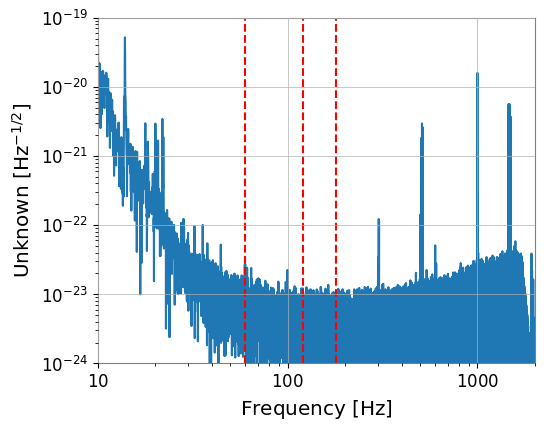

In [3]:
import matplotlib.pyplot as plt #import the plotting package.

# -- Plot ASD
fig2 = hdata.asd().plot() #hdata.asd translates the time series data into a frequency. Fig2 plots a figure below.
plt.xlim(10,2000) #add a domain to the plot for readability.
ymin = 1e-24 #add a range to the plot fitting of the frequencies given in the data.
ymax = 1e-19 #add a range to the plot fitting of the frequencies given in the data.
plt.ylim(ymin, ymax) #see above.
plt.vlines(60, ymin, ymax, linestyle="dashed", color="red") #mark noise peak 1.
plt.vlines(120, ymin, ymax, linestyle="dashed", color="red") #mark noise peak 2.
plt.vlines(180, ymin, ymax, linestyle="dashed", color="red") #mark noise peak 3.

# We see peaks at 60 Hz, 120 Hz, and 180 Hz, which are multiples of the used frequency (60 Hz).
#These frequencies are noise. The gravitational signal that we are looking for is overwhelmed behind these frequencies, so we take them out.

In [4]:
from gwpy.signal import filter_design #import filter_design from gwpy, which is used specifically to remove certain frequency bands.
bp = filter_design.bandpass(50, 250, hdata.sample_rate) #put the data through bandpass filtering, which cuts high and low frequencies to leave the appropriate mid-range.
notches = [filter_design.notch(line, hdata.sample_rate) for #use a 'for loop', a control flow statement, to enter (and remove) noise frequencies through 'notches'.
           line in (60, 120, 180)] #specify the noise frequences.

# These notches create a filter to ignore / omit the marked noise frequencies.

zpk = filter_design.concatenate_zpks(bp, *notches) #finalize the frequency filter, which will cut very high and low frequencies, as well as omit those noises via the notches.
hfilt = hdata.filter(zpk, filtfilt=True) #activate the filter (return the objects that are true).

In [5]:
hdata = hdata.crop(*hdata.span.contract(1)) #this crops the data to a window of 28 seconds instead of sixteen days.
hfilt = hfilt.crop(*hfilt.span.contract(1)) #this filters the specified data.
print(*hdata.span.contract(1)) #print to check that the range is reasonable.
#Our new data range (window) is shown below.

1264316102.0 1264316130.0


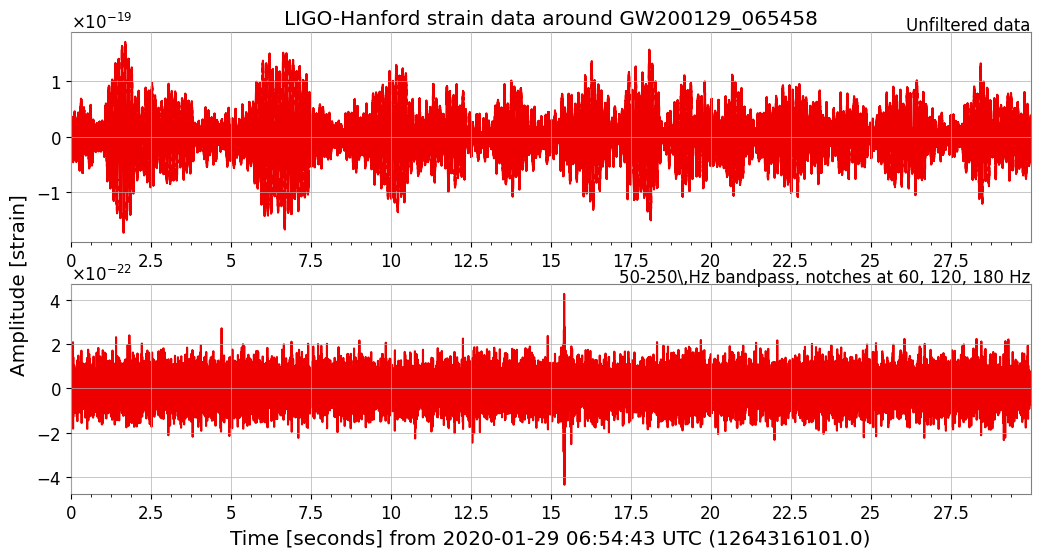

In [6]:
from gwpy.plot import Plot #import the plotting package from gwpy. This is different from matplotlib.
plot = Plot(hdata, hfilt, figsize=[12, 6], separate=True, sharex=True, color='gwpy:ligo-hanford') #plot the data.
ax1, ax2 = plot.axes #create two separate plots with differing x-axes.
ax1.set_title('LIGO-Hanford strain data around GW200129_065458') #title the plots.
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right') #add text to the right side of the first plot to specify that we have not yet filtered the data. 1.0, 1.01 represents the top right portion of the graph.
ax1.set_ylabel('Amplitude [strain]', y=-0.2) #transpose the label of the y-axis down for readability.
ax2.set_ylabel('') #we have already titled the plots along the x-axes, so a title along the y-axis is not needed.
ax2.text(1.0, 1.01, r'50-250\,Hz bandpass, notches at 60, 120, 180 Hz', transform=ax2.transAxes, ha='right') #add text to the right side of the second plot to specify how we have filtered the data.
plot.show() #show the plot.

# We notched out the 60 Hz (+ multiples) noise, so the remaining peak is something significant.
# Our first plot shows the data with no manipulation. The y-scale is 10^-19-- the noise dominates the data here, so we will have to manipulate the data.
# The second plot shows the manipulated data. Here the y-scale is 10^-24, so we can detect the gravitational waves.

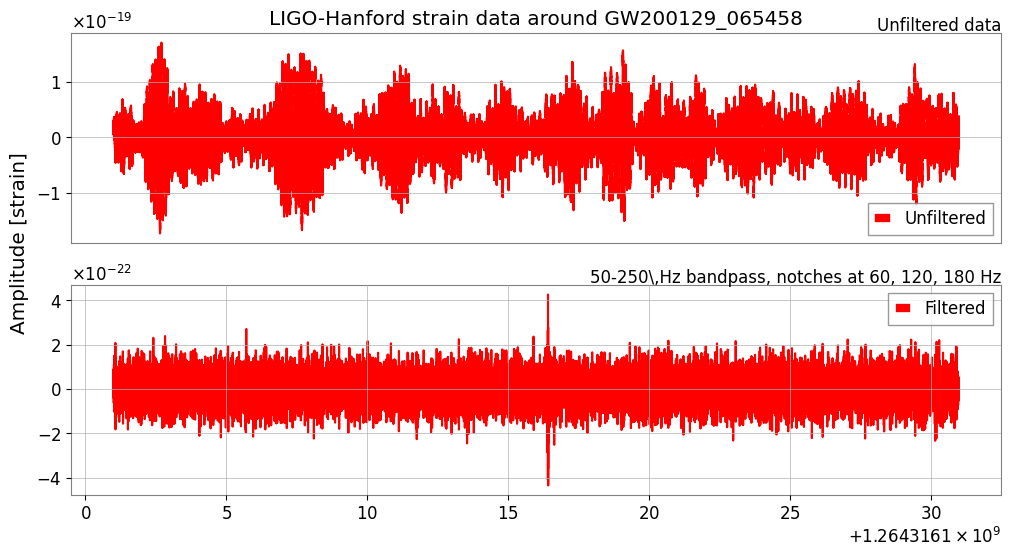

In [7]:
plt.figure(figsize=[12, 6]) #specify the size of the figure.
ax1 = plt.subplot(2, 1, 1) #create two seperate plots-- here we see two rows, one column, and the first of two plots, which is shown in the first half of the generated figure.
ax1.plot(hdata.times.value, hdata.value, color="red", label="Unfiltered") #where hdata stores its time and strain arrays. Professor Wang used ChatGPT.
plt.legend() #specify through a legend that this data is unfiltered.
ax1.set_title('LIGO-Hanford strain data around GW200129_065458') #title the plot along the x-axes.
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right') #add text to the right side of the first plot to specify that we have not yet filtered the data. 1.0, 1.01 represents the top right portion of the graph. See below.
ax1.xaxis.set_visible(False) #mute the x-axis on the first plot, for we only need it on the bottom.
ax2 = plt.subplot(2, 1, 2)  #create two seperate plots-- here we see two rows, one column, and the second of two plots, which is shown in the second half of the generated figure.
ax2.plot(hfilt.times.value, hfilt.value, color="red", label="Filtered") #where hdata stores its time and strain arrays. Professor Wang used ChatGPT.
ax2.set_ylabel('Amplitude [strain]', y=1.2) #label the y-axis. 1.2 shifts the y-axis label up by 20 percent so that it covers both graphs (we center it).
ax1.set_ylabel('') #mute the y-axis on the second plot, for we only need it from the top.
ax2.text(1.0, 1.01, r'50-250\,Hz bandpass, notches at 60, 120, 180 Hz',
         transform=ax2.transAxes, ha='right') #add text to the right side of the second plot to specify how we have filtered the data.
plt.legend() #specify through a legend that this data is filtered.

#Here, we plot the same graph as above, except we do not use gwpy, and instead use matplotlib.

In [8]:
hdata.value # print the array of values.

array([7.78093662e-21, 1.18189890e-20, 1.68268607e-20, ...,
       3.61726168e-20, 3.83861177e-20, 2.07685020e-20])

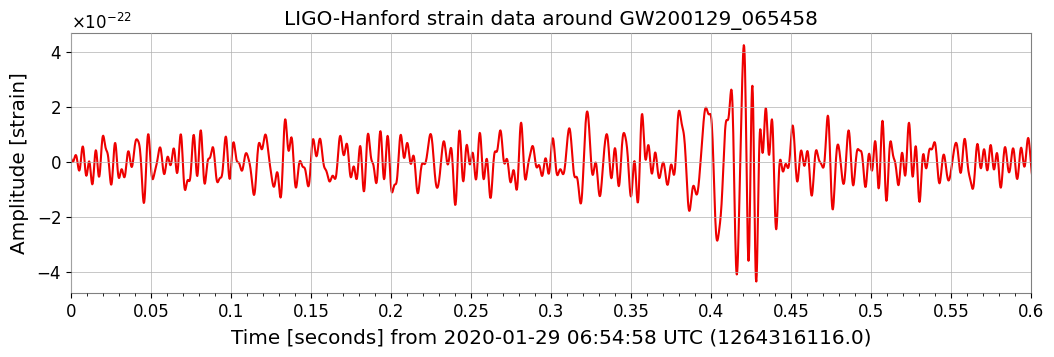

In [9]:
plot = hfilt.plot(color='gwpy:ligo-hanford') #plot the filtered data.
ax = plot.gca() #'get the current axes.'
ax.set_title('LIGO-Hanford strain data around GW200129_065458') #title the plot.
ax.set_ylabel('Amplitude [strain]') #label the y-axis.
ax.set_xlim(1264316116, 1264316116.6) #set the domain equal to 0.6 seconds to get a snapshot of the event itself.
ax.set_xscale('seconds', epoch=1264316116) #label the x-axis. Epoch will generate the time at which the event happened via 'date precision.'
plot.show() #show the plot.

x_val = plt.gca().lines[0].get_xdata() #'get the current axes and x-data.'
y_val = plt.gca().lines[0].get_ydata() #'get the current axes and y-data.'


Next, we will superimpose the adjusted data from one LIGO center upon the other in order to compare the signal as seen by both centers.

LIGO uses two centers in order to reduce false positives of signal detection: when we see the same signal at both centers, we can be confident that the signal is astronomical-- a result of gravitational waves.

In [10]:
ldata = TimeSeries.fetch_open_data('L1', 1264316100, 1264316132) #crop the data to 32 seconds to make a new time window.
lfilt = ldata.filter(zpk, filtfilt=True) #activate the filter (return the objects that are true).

In [11]:
import astropy.units as u #import a Python package to call certain units.
D = (0.0069 * u.s) * (3e8 * u.m/u.s) #calculate the distance between Livingston and Hanford using the speed of light and the given timeshift.
print(D) #printing this value, which is accurate, shows that the timeshift makes sense.

2070000.0 m


In [12]:
lfilt.shift('6.9ms') # this shift in the data accounts for the time difference in the two different places.
lfilt *= -1 #invert the signal (part of accounting for the time difference).
#Light travels the distance between Hanford and Livingston (207000m) in 6.9 milliseconds.
#The wave travels at an angle, hitting one place first, and then the other.

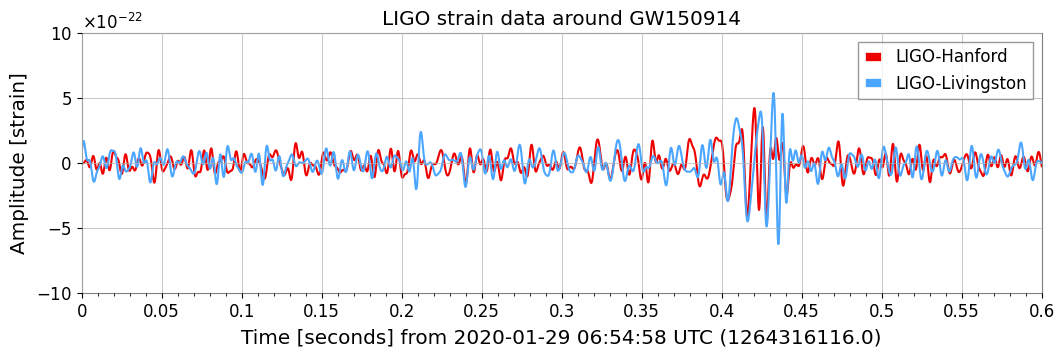

In [13]:
plot = Plot(figsize=[12, 4]) #specify the size of the figure.
ax = plot.gca() #'get the current axes.'
ax.plot(hfilt, label='LIGO-Hanford', color='gwpy:ligo-hanford') #plot the stored data and label the Hanford data set.
ax.plot(lfilt, label='LIGO-Livingston', color='gwpy:ligo-livingston') #plot the stored data and label the Livingston data set.
ax.set_title('LIGO strain data around GW150914') #title the plot along the x-axes.
ax.set_xlim(1264316116, 1264316116.6) #set the domain equal to 0.6 seconds to get a snapshot of the event itself.
ax.set_xscale('seconds', epoch=1264316116) #label the x-axis. Epoch will generate the time at which the event happened via 'date precision.'
ax.set_ylabel('Amplitude [strain]') #label the y-axis.
ax.set_ylim(-1e-21, 1e-21) #add a fitting range for the data.
ax.legend() #specify through a legend which data comes from Hanford, and which data comes from Livingston.
plot.show() # show the plot.
#We overlay the data from the two LIGO centers.


https://colab.research.google.com/github/losc-tutorial/quickview/blob/master/index.ipynb
Also from: https://gwpy.github.io/docs/stable/examples/signal/qscan/

With the signal having been confirmed at both centers, we can make a high-resolution graph of the frequency as an easy way of visualizing the event.

From there, we can transcribe that frequency data into something listenable to the human ear, thus creating something known as 'The Chirp,' an audio representation of the black hole merger.

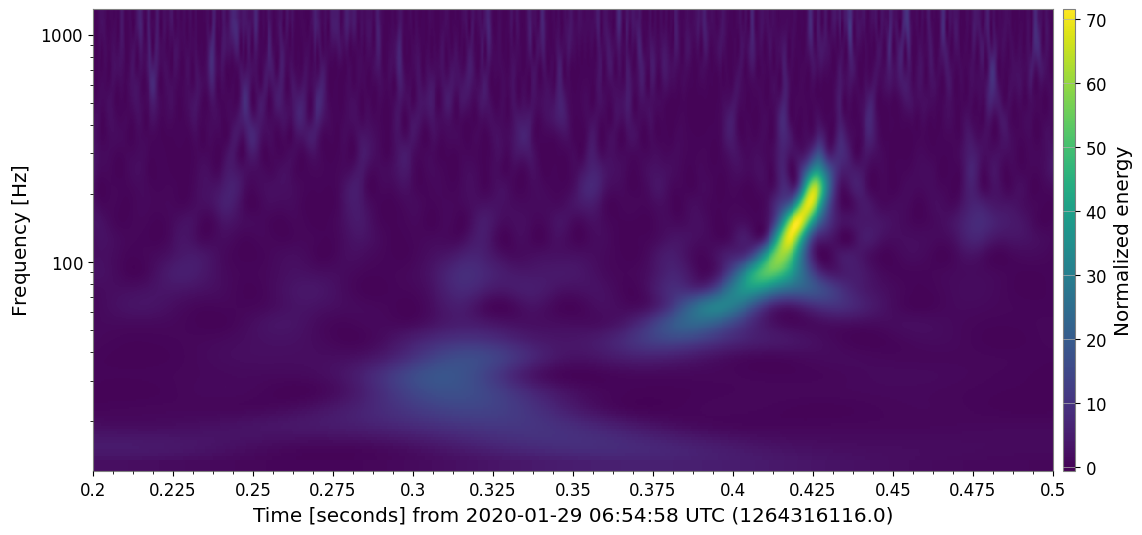

In [14]:
dt = 0.2  #-- Set width of q-transform plot, in seconds.
hq = hfilt.q_transform(outseg=(t0-dt, t0+0.1)) #make a high-resolution time-frequency map of the filtered data.
fig4 = hq.plot() #plot the map.
ax = fig4.gca() #'get the current axes.'
fig4.colorbar(label="Normalized energy") #label the color bar for the map.
ax.grid(False) #hide the grid lines.
ax.set_yscale('log') #use a logarithmic scale for the y-axis.

In [15]:
from scipy.io.wavfile import write
import numpy as np
#We are importing the proper packages to turn the data into 'the chirp'-- something we can hear.

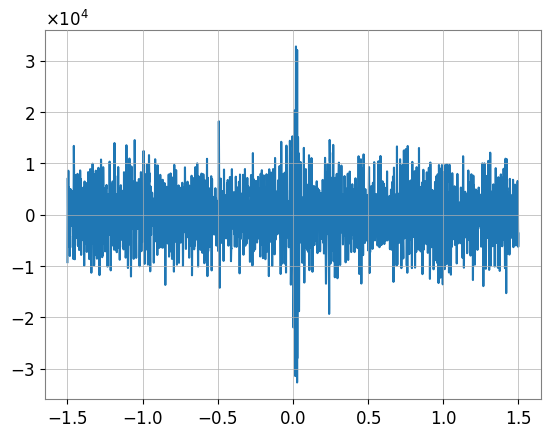

In [16]:
amplitude = np.iinfo(np.int16).max #this is a statement about the machine limit. The machine parameters for int16 are min = -32768 to max = 32767.

ind = np.where((x_val < (t0+1.5)) & (x_val > (t0-1.5))) #in essence, set up a domain for the plot.
y = y_val[ind] #plot the y-values for the domain set up above through the index.
#y = y**3
y = y / np.max(y) # divide the values for y by the maximum value of y.
plt.plot(x_val[ind] - t0, (np.array(y) * amplitude).astype(np.int16)) # plot the data.
#Here we are transposing the data up into listenable frequencies, which will allow us to make a sound file of the black merger later on in the code.
#Note that the shape of the plot is the same, so we haven't adulterated the data by doing this.

In [17]:
fs = int(1 / np.median(np.diff(np.array(x_val[ind] - t0)))) #use the median value of the data to convert it into something listenable.
print("fs = ", fs) #print the median value to check that it is reasonable.
write("example.wav", fs, (np.array(y) * amplitude).astype(np.int16)) #use 'write' to prepare the sound file.

fs =  4096


In [18]:
from google.colab import files #import the file so that it is able to be downloaded.
files.download("example.wav") #create an output to download the file.
#The file will open in Apple Music. Here, transposed for the human eardrum, we can hear an approximate sound for the black hole merger.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Finally, after plotting, confirming, and transposing the event to be detectable by our senses, we can further analyze it.

We are able to perform reasonable calculations for the final mass of the merged bodies, the distance from Earth to the merger, and, finally, the energy released by the merger.

Derivations of equations were gone over during class time.

In [27]:
import astropy.constants as const # import a Python package to call the value of certain constants.

T = (0.4258 - 0.4201) * u.s # define the time interval used to calculate the mass of the black hole
M_BH = (T * const.c**3) / (4 * np.sqrt(2) * np.pi * const.G) # define the equation for the mass of the black hole.
print(M_BH.to(u.solMass)) # print out the mass of the black hole merger in solar masses.

65.11791231381045 solMass


In [34]:
S = 1e-21 # define the limit of the strain for the data.
D = T * const.c / (16 * np.pi * S) # define the equarion for the distance to the merger.
print(D.to(u.Mpc)) # print out the distance to the merger in megaparsec.

1101.7299559577643 Mpc


In [32]:
M_Real = 63.3 * u.solMass # define the final mass of the merger.
M_Tot = (34.5 + 29) * u.solMass # define the total mass of both black holes before merging, or the predicted final mass if no energy is lost.
E = (M_Tot - M_Real) * (const.c**2) # use Einstein's mass-energy equivalence to find the energy released by the merger.
print(E.to(u.J)) # print out the energy released by the merger in joules.

3.5741873374826093e+46 J
